In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Neuron functions and feasible weight vectors
*Lectures 1+2, GH*

**Linear neurons**

$y=b+\sum_ix_iw_i$

In [3]:
def linear_neuron(x,w,b = 0):
    """
    x = (m*1)
    w = (m*1)
    b = scalar
    """
    assert (len(x.shape) ==1) & (len(w.shape) == 1) & (x.shape[0] == w.shape[0])
    print("shape(x) is %s and shape(w) is %s" %(str(x.shape),str(w.shape)))
    y = b + np.dot(w.T,x)
    return y

x = np.random.rand(100,)
w = np.random.rand(100,)
y = linear_neuron(x,w)

print(y, y.shape)

shape(x) is (100,) and shape(w) is (100,)
23.9605263108 ()


In [4]:
def binary_threshold_neuron(x,w,b = 0, theta = None):
    """
    x = (m*1)
    w = (m*1)
    b = scalar
    """
    assert (len(x.shape) ==1) & (len(w.shape) == 1) & (x.shape[0] == w.shape[0])
    if theta == None: theta = -b
    print("shape(x) is %s and shape(w) is %s" %(str(x.shape),str(w.shape)))
    z = b + np.dot(w.T,x)
    print("z is %.3f" % z)
    y = 1 if (z >= theta) else 0
    return y

x = np.random.rand(100,)
w = np.random.rand(100,)
y = binary_threshold_neuron(x,w, b=1, theta = 60)

print("y is %.3f" % y)

shape(x) is (100,) and shape(w) is (100,)
z is 27.390
y is 0.000


In [5]:
def sigmoid_neuron(x,w,b = 0.):
    """
    x = (m*1)
    w = (m*1)
    b = scalar
    """
    assert (len(x.shape) ==1) & (len(w.shape) == 1) & (x.shape[0] == w.shape[0])
    print("shape(x) is %s and shape(w) is %s" %(str(x.shape),str(w.shape)))
    z = b + np.dot(w.T,x)
    print("z is %.3f" % z)
    y = 1. / (1. + np.exp(-z))
    return y

x = np.random.rand(100,)
w = np.random.rand(100,) * np.full(100,.001) #make weights small scale
y = sigmoid_neuron(x,w)

print("y is %.25f" % y)

shape(x) is (100,) and shape(w) is (100,)
z is 0.021
y is 0.5053624108087351185503167


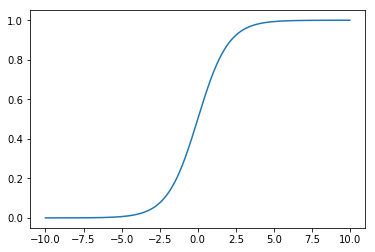

In [6]:
def plot_sigmoid():
    z = np.arange(-10,10,.02)
    y = 1. / (1. + np.exp(-z))
    plt.plot(z,y)
    plt.show()
plot_sigmoid()

**Angle between vectors**

$A.B = |A|.|B|.cos(\theta)$

In [8]:
def get_angle_dot_vectors(v1,v2):
    """
    Returns the angle (in degrees) and dot product of 2 vectors
    """
    dot_product = np.dot(v1,v2)
    cos_theta = dot_product/(np.linalg.norm(v1)*np.linalg.norm(v2))
    return np.degrees(np.arccos(cos_theta)), dot_product
v1 = np.array([1,2])
v2 = np.array([-1,3])
print(get_angle_dot_vectors(v1,v2))
v2 = np.array([-1,0.5]) #perpendicular
print(get_angle_dot_vectors(v1,v2))
v2 = np.array([-1,0.2]) #theta > 90
print(get_angle_dot_vectors(v1,v2))

#Multidimentional
v1 = np.random.rand(5)
v2 = np.random.rand(5)
print("Multidimentional vectors", v1, v2)
print(get_angle_dot_vectors(v1,v2))

(45.000000000000007, 5)
(90.0, 0.0)
(105.25511870305778, -0.59999999999999998)
Multidimentional vectors [ 0.08918746  0.55170278  0.52871369  0.6970892   0.61680078] [ 0.64628073  0.22057903  0.26132799  0.23215712  0.64651639]
(43.546934955657242, 0.87810792158916384)


### Neuron unit derivatives
*Lecture 3, GH*

**Delta rule** for **linear** neuron

$\Delta w_i = -\varepsilon x_i(t-y)$

** Derivation **

Assume we have $N$ training samples and $W$ weight parameters.

Our training samples are a matrix $x$ with element $x_{n,i}$ representing the $i$-th input value (column) for the $n$-th sample (row). $t$ represents a $N$-long vector containing the truth outcomes, while $y$ is a similarly $N$-long vector with the predicted outcomes.

Our total model error $E = \frac {1}{2} \sum_{n \in N} (t_n - y_n)^2$ and individual sample error $E_n = \frac {1}{2}(t_n - y_n)^2$.

We want to get the error $E$ to approach zero, thus we differentiate the error formula w.r.t. all weight parameters $W$. Since the same weight vector $W$ applies to all training cases, and each training case will yield a different partial differential for $W$, we can't in one go zero the error of all training cases.

Instead we differentiate $E$, the sum of all errors on each weight parameter and substract the partial derivatives from the weight in the hope of minimizing the total error. If we do this for enough iteratios, we are guaranteed to reach a solution if a feasible solution exists. Convergence proof at http://www.cs.columbia.edu/~mcollins/courses/6998-2012/notes/perc.converge.pdf

Partial derivatives: For $i \in W , 
\frac{\partial E}{\partial w_i} = \frac{1}{2} \sum_{n \in N} \frac{\partial y_n}{\partial w_i} 
\frac{dE_n}{dy_n}$ using chain rule

Since $\frac{\partial y_n}{\partial w_i} = x_{n,i}$, by definition of $y_n$, and $\frac{dE_n}{dy_n} = (t_n - y_n)$ by applying the product rule to the definition of individual sample error.

Thus $\frac{\partial E}{\partial w_i} = x_{n,i}.(t_n - y_n)$

To get $\Delta w_i$, we use multiply the partial derivative $\frac{\partial E}{\partial w_i}$ by both $-1$ and $\varepsilon$. The $-1$ ensures that the new error value is less than the current one, while $\varepsilon$, a positive real number, is called the *training rate*.

**How** does multiplying by $-1$ ensure error $E$ is decreasing? Courtsey of http://users.sussex.ac.uk/~khs20/mtcs/mtcs/tutorial2.html

From definition of differentiation and for any $w$ weight vector and $x$ input vector, $\frac{\partial E}{\partial w} \approx \frac{\Delta E}{\Delta w}$ for an infinitesimally small $\Delta w = w - w_o$. Thus $\frac{E-E_o}{w-w_o} \approx (t-y).x$

Assume $\Delta w = -\varepsilon.(t-y).x$, then $E-E_o = (\varepsilon.(t-y).x).((t-y).x) = -\varepsilon.(t-y)^2.x^2$, which is always negative. Thus, assuming a small value for $\varepsilon$, adding the negative valued $\Delta w$ to the current weights $w_o$, we will get the desired effect of lowering $E$.

**Why** we use the learning rate $\varepsilon$, and how to set it? 

Finally we conclude that, the **batch delta** rule is $\Delta w_i = -\varepsilon \sum_{n \in N}x_{n,i}.(t_n - y_n)$

**Error surface of neuron**

requires simulation data, tbd

**Delta rule** for **logistic** neuron/unit

For a logistic neuron where $y = \frac{1}{1+e^{-z}}$ with $z = b+\sum_i x_iw_i$

$\Delta w_i = -\varepsilon x_i.y.(1-y).(t-y)$



**Derivation**:

$\frac{\partial E}{\partial w_i} = \sum_{n \in N}\frac{\partial y_n}{\partial w_i} \frac{dE_n}{dy_n} = \sum_{n \in N}\frac{\partial z_n}{\partial w_i} \frac{dy_n}{dz_n} \frac{dE_n}{dy_n}$ using chain rule.

We now work out all 3 components;

- $\frac{\partial z_n}{\partial w_i} = x_{n,i}$
- $\frac{dy_n}{dz_n} = y.(1-y)$, here is how;
    - Since $y = (1+e^{-z})^{-1}$
    - $\frac{dy}{dz} = \frac{-1.e^{-z}}{(1+e^{-z})^2}$, using power rule, $ = \frac{1}{1+e^{-z}}.\frac{e^{-z}}{1+e^{-z}} \\
    = y.\frac{(1+e^{-z})-1}{1+e^{-z}} \\
    = y.\frac{(1+e^{-z})}{1+e^{-z}}.\frac{-1}{1+e^{-z}} \\
    = y.(1-y)$
- $\frac{dE_n}{dy_n} = (t_n - y_n)$ by using the power rule

Back to deriving our error function, $\frac{\partial E}{\partial w_i} = x_{n,i}.y.(1 - y).(t_n - y_n)$ and for a batch weight correction, we use $\Delta w_i = -\varepsilon \sum_{n \in N}x_{n,i}.(t_n - y_n)$

### Backpropagation error derivatives

Assume the neural network has an output layer with $J$ neurons and hidden layer with $I$ neurons. The output value $y_i$, created by neuron $j$ activated by value $z_j$. $z_j$ is the *sigmoid* output of $I$ neurons layer with weights $w_{i,j}, i \in I$. We also assume that the neuron $i$ is in the hidden layer where other neurons in layer $i$ feed into the neuron $j$ in a following layer. 

PUT PICTURE FROM SLIDE 28 of lec.3

We want to figure out how fast the output error $E = \frac{1}{2}\sum_{j \in J}(t_j - y_j)^2$ changes as we change the hidden weights $\frac{\partial E}{\partial w_{i,j}}$, and how it changes in response to the output of the hidden neuron $\frac{\partial E}{\partial y_i}$ . We will first work out the case for a single weight $w_{i,j}$, of the edge between the hidden neuroon $i$ and the subsequent neuron $j$, and its impact on $E$ through $y_j$.

Remember that $\frac{\partial z_j}{\partial w_{i,j}} = y_i$ since $z_j = y_i.w_{i,j}$.

$\frac{\partial E}{\partial w_{i,j}}$ 
$= \frac{\partial z_j}{\partial w_{i,j}}.\frac{\partial E}{\partial z_j} \\
 = y_i.\frac{\partial y_j}{\partial z_j}.\frac{\partial E}{\partial y_j} \\
 = y_i.y_j.(1-y_j).(t_j - y_j)$

$\frac{\partial E}{\partial y_i}$
$= \sum_{j \in J}\frac{dz_j}{dy_i}.\frac{\partial E}{\partial z_j} \\
 = \sum_{j \in J} w_{i,j}.\frac{\partial E}{\partial z_j} \\
 = \sum_{j \in J} w_{i,j}.(y_j.(1-y_j).(t_j - y_j))$

### Softmax and choice

Softmax allows us to constrain the *logistic* outputs of a neural network to represent a probability distribution across discrete alternatives

Assume $i$ is the index of the alternative we are calculating from a $J$ set of alternatives.
Softmax is defined as $y_i = \frac{e^{z_i}}{\sum_{j \in J} e^{z_j}}$, with derivative $\frac{\partial y_i}{\partial z_i} = y_i(1 - y_i)$, and $\frac{\partial y_i}{\partial z_j} = -y_i. y_j$ when $ i\neq j$

In [12]:
def softmax(z):
    """
    z = (m*1)
    """
    assert (len(z.shape) ==1)
    print("shape(z) is %s" %str(z.shape))
    exp_z = np.exp(z.T)
    y = exp_z / sum(exp_z)
    return y

print(softmax(np.array([10,1,-10])))
print(softmax(np.array([1,.1,-1])))
print(softmax(np.array([1000,2000,5000])))

shape(z) is (3,)
[  9.99876603e-01   1.23394576e-04   2.06089928e-09]
shape(z) is (3,)
[ 0.64854841  0.26368011  0.08777148]
shape(z) is (3,)
[ nan  nan  nan]


C:\Users\jrateb\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
C:\Users\jrateb\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [14]:
def softmax_shifted(z):
    """
    z = (m*1)
    """
    assert (len(z.shape) ==1)
    print("shape(z) is %s" %str(z.shape))
    shifted_z = z - np.max(z)
    exp_z = np.exp(shifted_z.T)
    y = exp_z / sum(exp_z)
    return y

print(softmax_shifted(np.array([1000,2000,5000])))

shape(z) is (3,)
[ 0.  0.  1.]


**Derivation** of softmax

Credits to https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/

$\frac{\partial y_i}{\partial z_j} = \frac{\partial \frac{e^{z_i}}{\sum_{k \in K} e^{z_k}}}{\partial {z_j}}$ 

We will use the quotient rule: For $f(x) = \frac{g(x)}{h(x)}, f'(x)= \frac{g'(x)h(x) - h'(x)g(x)}{(h(x))^2}$, and set $g(x) = e^{z_i}$ and $h(x) = \sum_{k \in K} e^{z_k}$. We will also use the fact that $\frac{d(e^x)}{dx} = e^x$

Also, note that the derivative of $g_i$ w.r.t. $z_j$ is $e^{z_j}$ only if $i = j$, otherwise, the derivative is $0$.

First, we will derive the case where $i = j$: 

$\frac{\partial y_i}{\partial z_j} = \frac{\partial \frac{e^{z_i}}{\sum_{k \in K} e^{z_k}}}{\partial {z_j}}$ 
$ = \frac{e^{z_i} \sum_{k \in K} e^{z_k} - e^{z_j} e^{z_i}}{{\sum_{k \in K} e^{z_k}}^2} \\
 = \frac{e^{z_i}}{\sum_{k \in K} e^{z_k}} \frac{\sum_{k \in K} e^{z_k} - e^{z_j}}{\sum_{k \in K} e^{z_k}} \\
 = y_i(1-y_j)$
 
Finally, if $i \neq j$:

$\frac{\partial y_i}{\partial z_j} = \frac{\partial \frac{e^{z_i}}{\sum_{k \in K} e^{z_k}}}{\partial {z_j}}$ 
$ = \frac{0 - e^{z_j} e^{z_i}}{{\sum_{k \in K} e^{z_k}}^2} \\
 = - \frac{e^{z_j}}{\sum_{k \in K} e^{z_k}} \frac{e^{z_i}}{\sum_{k \in K} e^{z_k}} \\
 = - y_j y_i$